In [153]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy.stats import linregress
import statsmodels.api as sm
import warnings


# Lexique

- Intercept
In linear regression, the intercept represents the point where the regression line intersects the y-axis when x equals zero. It is also known as the constant term.

- Slope
The slope of a regression line represents the rate at which the dependent variable changes with respect to changes in the independent variable. In other words, it represents the amount by which the dependent variable changes when the independent variable increases by one unit.

- Coefficients
In a linear regression model, the coefficients represent the values assigned to each of the predictor variables in the model. They indicate the strength and direction of the relationship between the predictor variables and the dependent variable.

- Residual sum of squares (RSS)
The residual sum of squares is a measure of the differences between the observed values and the predicted values of the dependent variable in a regression model. It represents the sum of the squared differences between the actual values and the predicted values.

- Supervised/Unsupervised learning
Supervised learning is a machine learning approach in which the model is trained on labeled data, where the desired output is known for each input. Unsupervised learning, on the other hand, is a machine learning approach in which the model is trained on unlabeled data, and the goal is to identify patterns or relationships within the data.

- Classification/Regression
Classification is a type of supervised learning in which the goal is to predict a categorical variable, such as yes or no, or different classes of objects. Regression, on the other hand, is a type of supervised learning in which the goal is to predict a continuous variable, such as temperature, price, or time.

- Parametric/Non-parametric
Parametric models assume a specific distribution for the data, such as a normal distribution, and the parameters of the model are estimated based on that assumption. Non-parametric models do not make any assumptions about the underlying distribution of the data.

- Overfitting/Underfitting
Overfitting occurs when a model is too complex and captures the noise in the data, leading to poor generalization performance on new data. Underfitting occurs when a model is too simple and does not capture the underlying patterns in the data, leading to poor performance on the training data.

- Bias/Variance tradeoff
The bias-variance tradeoff is a fundamental concept in machine learning that refers to the tradeoff between the complexity of the model and its ability to generalize to new data. A model with high bias tends to underfit the data, while a model with high variance tends to overfit the data.

- Cross-validation
Cross-validation is a technique used to evaluate the performance of a machine learning model by partitioning the data into training and testing sets, and then testing the model on multiple different partitions to obtain an estimate of its generalization performance.

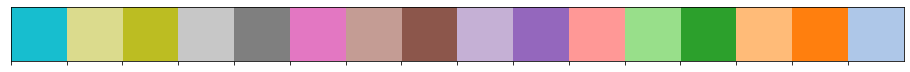

In [198]:
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = sns.color_palette("tab20_r", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

# Cross Validation, Model Selection & Regularisation

In this notebook we will introduce the concepts below, and how they can be implemented in `scikit-learn`.
* Cross validation - a method for estimating the test error rate when test data is not available
* Model selection - how we use cross validation to select which model (from a selection) we should use for a particular data set
* Regularisation - an adaptation of linear regression to make it more flexible

[This video](https://www.youtube.com/watch?v=DQWI1kvmwRg) describes some of the ideas you will face in the coming notebook. The ideas we are covering here are described much more throughly in **ISLR** (see suggested sections in module overview).

https://trevorhastie.github.io/ISLR/

------

# Cross Validation

### K-fold cross validation

#### Task 1

* Have a look at the code below and check you understand what is going on. (Add some print statements in various places to help.)

In [155]:
from sklearn.model_selection import KFold

In [156]:
X = np.array([['A', 'B'], ['C', 'D'], ['E', 'F'], ['G', 'H']])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=3) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(X)

for train_index, valid_index in kf.split(X): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

- n_splits=3: 
Specifies that the dataset will be split into 3 folds or subsets. In other words, the cross-validation process will be repeated 3 times, with each fold used once for testing and the other 2 folds used for training.

- random_state=None
Specifies that no specific seed will be used for the random number generator. If you want to ensure that the same random splits are generated each time you run the code, you can set this parameter to an integer value.

- shuffle=False
Specifies that the data will not be shuffled before splitting it into folds. If you want to shuffle the data before splitting it, you can set this parameter to True.


In [157]:
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [158]:
for train_index, valid_index in kf.split(X):
    print("Train index --> ", train_index)
    print("Subset X ----->", X[train_index])
    print("Valid index --> ", valid_index)
    print("Subset valid ->", X[valid_index])

Train index -->  [2 3]
Subset X -----> [['E' 'F']
 ['G' 'H']]
Valid index -->  [0 1]
Subset valid -> [['A' 'B']
 ['C' 'D']]
Train index -->  [0 1 3]
Subset X -----> [['A' 'B']
 ['C' 'D']
 ['G' 'H']]
Valid index -->  [2]
Subset valid -> [['E' 'F']]
Train index -->  [0 1 2]
Subset X -----> [['A' 'B']
 ['C' 'D']
 ['E' 'F']]
Valid index -->  [3]
Subset valid -> [['G' 'H']]


#### Task 2
* try adding print statements for the size of the dataframes in each split
* try increasing the number of splits and re-run your code
* use the code below to print a car name contained in the train and validation data set, for each split



In [159]:
auto = pd.read_csv('./data/Auto.csv')
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto.horsepower.astype(int)
auto.reset_index(inplace=True, drop=True)
auto.shape

(392, 9)

In [160]:
mpg = auto.pop('mpg') # mpg will be our target and so we remove this into a seperate array

In [161]:
# on a 392 lignes

kf = KFold(n_splits=10) # here we choose the number of folds (or splits) we will make
kf.get_n_splits(auto)

print(kf)
print("")


split_counter = 1
for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    #print('-'*60)
    #print('This is split no: {}'.format(split_counter))
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    print("Complementarity of Index")
    print("Train index -->")
    print("")
    print(train_index)
    print("Valid index --> ")
    print("")
    print(valid_index) 
    print("")
    print("---------------------------------------------------------")
    print("")
    print("Somme des listes d'index --> ")
    print(f"S = {len(train_index)}+{len(valid_index)} = {len(train_index) + len(valid_index)}")
    print("")
    print("---------------------------------------------------------")
    print("TRAIN set Car data :")
    print(f"The car name at index --> {train_index[6]} <-- is --> {X_train.loc[train_index[6],'name']}")
    print("")
    print("---------------------------------------------------------")
    print("VALID set Car data :")
    print(f"The car name at index --> {valid_index[6]} <-- is --> {X_valid.loc[valid_index[6],'name']}")
    print("")
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    # your code here
    #print('Train car name here', X_train["name"])
    #print('Validation car name here')

KFold(n_splits=10, random_state=None, shuffle=False)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Complementarity of Index
Train index -->

[ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 2

### Test regression on different substets

In [162]:
auto = auto.drop('name', axis=1, errors='ignore') # we do not need the car names so remove for now.

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


split_counter = 1
mse_scores = [] # create empty list to append mse scores for each split
kf = KFold(n_splits=5)
kf.get_n_splits(auto)

for train_index, valid_index in kf.split(auto): # kf.split(X) is an iterable which gives us the indices of the data in each fold
    print('-'*60)
    print('This is split no: {}'.format(split_counter))
    print('Model results')
    split_counter += 1 
    X_train, X_valid = auto.iloc[train_index], auto.iloc[valid_index] # must use .iloc because its a dataframe this time
    y_train, y_valid = mpg[train_index], mpg[valid_index]
    
    
    #### fit polynomial to train data in this split
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
    #### eval & print MSE training results in this split
    mpg_train_pred = lin_reg.predict(X_train)
    mse_train = mean_squared_error(y_train, mpg_train_pred)
    print('training MSE: {0}'.format(mse_train))
    
    #### do the same for validation split
    mpg_valid_pred = lin_reg.predict(X_valid)
    mse_valid = mean_squared_error(y_valid, mpg_valid_pred)
    print('validation MSE: {0}'.format(mse_valid))
    
    mse_scores.append(mse_valid) # assign validation MSE score to list

------------------------------------------------------------
This is split no: 1
Model results
training MSE: 11.284070590565994
validation MSE: 14.974307651304237
------------------------------------------------------------
This is split no: 2
Model results
training MSE: 11.155158050598772
validation MSE: 10.905952427081187
------------------------------------------------------------
This is split no: 3
Model results
training MSE: 12.160105136871517
validation MSE: 5.99170861010817
------------------------------------------------------------
This is split no: 4
Model results
training MSE: 9.92167414540569
validation MSE: 15.587544657621594
------------------------------------------------------------
This is split no: 5
Model results
training MSE: 7.977511689294957
validation MSE: 27.844743081984188


#### Validation of MSE computed on several subsets

In [164]:
mse_scores  = np.array(mse_scores)
print('VALIDATION SET MSE SCORES')
print('mean MSE:', mse_scores.mean())
print('std MSE:', mse_scores.std())

VALIDATION SET MSE SCORES
mean MSE: 15.060851285619876
std MSE: 7.2556918148909215


In [165]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') 

print(f"MSE par KFOLD --> {-cv_scores}")
print('mean MSE:',np.mean(-cv_scores))
print('std MSE:',np.std(-cv_scores))

MSE par KFOLD --> [14.97430765 10.90595243  5.99170861 15.58754466 27.84474308]
mean MSE: 15.060851285619876
std MSE: 7.2556918148909215


#### Task 3

- Make sure you understand the output of the cross_val_score above (i.e. What is cv_scores?)

- Why is the scoring defined as negative MSE? Do some research

- Investigate what the `cross_val_predict` function does.

- Import and implement `cross_val_predict`on the same data as above.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(auto, mpg, random_state = 18)

lin_reg = LinearRegression()


predictions = cross_val_predict(lin_reg, auto, mpg, cv=5)




cv_scores = cross_val_score(lin_reg, auto, mpg, cv = 5, scoring='neg_mean_squared_error') 
cv_scores.std()
mpg.std()

7.805007486571799

- What are the outputs of this function?

Results MSE 
15.060851285619876
7.2556918148909215


<AxesSubplot:xlabel='mpg'>

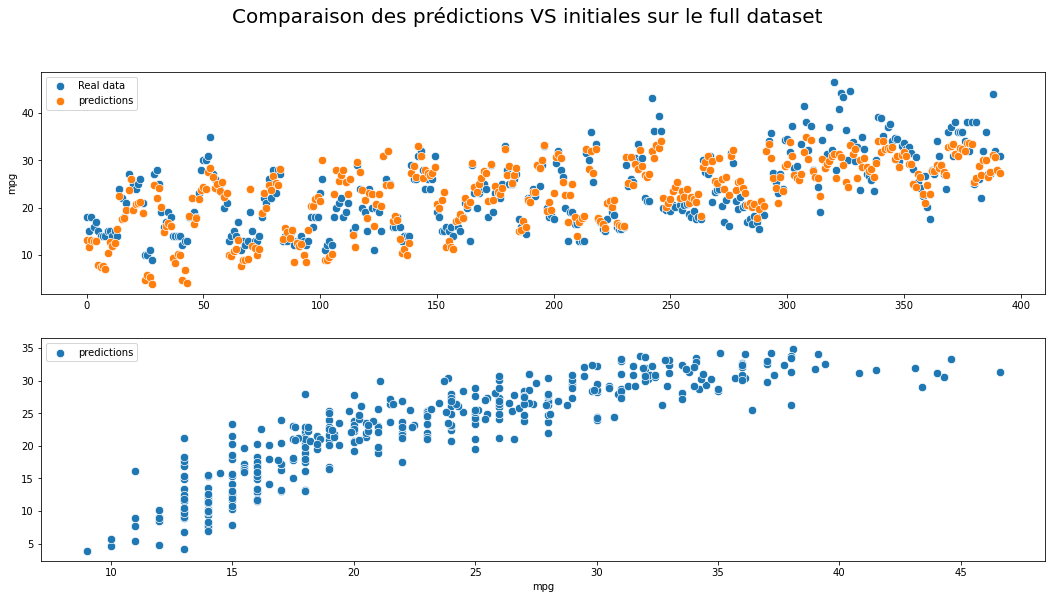

In [167]:
print("Results MSE ")
print(-cv_scores.mean())
print(cv_scores.std())

fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(18,9))
fig.suptitle("Comparaison des prédictions VS initiales sur le full dataset", fontsize=20)


sns.scatterplot(
    ax=ax[0],
    data=auto, 
    x=auto.index, 
    #x="MSE",
    y=mpg, 
    s=70,
    label="Real data"
)
sns.scatterplot(
    ax=ax[0],
    data=auto, 
    x=auto.index, 
    #x="MSE",
    y=predictions, 
    s=70,
    label="predictions"
)

sns.scatterplot(
    ax=ax[1],
    data=auto, 
    x=mpg, 
    #x="MSE",
    y=predictions, 
    s=70,
    label="predictions"
)

- Can you use these to evaluate the results of your cross validation?

- Do the cross-validation scores give you confidence this model is providing a useful prediction?

In [168]:
len(predictions)

392

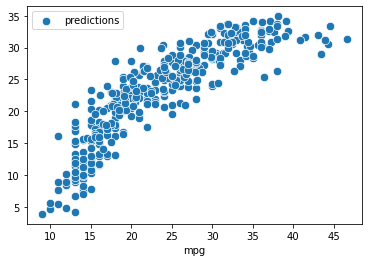

In [169]:
ax = sns.scatterplot(
    data=auto, 
    x=mpg, 
    #x="MSE",
    y=predictions, 
    s=70,
    label="predictions"
)

## Excercise 1: wine cross-validation

You must predict the alcohol content of various wines based on their other attributes.

* Split the data into train and test data sets (Ensure you use the option: `random_state = 28`).
* Perform linear regression using k-fold cross validation(ensure you use 5 folds). Return the cross validation MSE errors. Return the mean and standard deviations of these.
* Evaluate the performance of the model on the test set.
* Compare the cross-validation error and the test error (MSE). What do you find? 
* Try removing the random_state option. What happens to your results? Explain why.

In [170]:
def  compute_indicator(true_values,predicted_values):
    MSE = mean_squared_error(true_values, predicted_values)
    MAE = mean_absolute_error(true_values, predicted_values)
    RMSE = mean_squared_error(true_values, predicted_values, squared=False)
    MEDAE = median_absolute_error(true_values, predicted_values)
    R2 = r2_score(true_values, predicted_values)
    print(f"MSE ----> {MSE}")
    print(f"RMSE ---> {RMSE}")
    print(f"MAE ----> {MAE}")
    print(f"MEDAE --> {MEDAE}")
    print(f"R2 -----> {R2}")
    return MSE, RMSE, MAE, MEDAE, R2

In [171]:
def compare_train_test(y_train, y_pred_train, y_test, y_pred_test):
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    print("Results for TRAIN data :")
    print("")
    compute_indicator(y_train, y_pred_train)
    print("----------------------------------------------")
    print("Results for TEST data ")
    print("")
    compute_indicator(y_test, y_pred_test)
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")

In [172]:
def import_df(name):
    cwd = os.getcwd()
    filename = name
    df = pd.read_csv(cwd + "/data/" + filename)
    return df

#### Import data

In [173]:
df_wine = import_df("wine.csv")
alcohol = df_wine["Alcohol"]
df_wine.drop(columns="Alcohol", inplace=True)

#### Split data between Test & Train dataset

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df_wine, alcohol, random_state = 28)

#### K-fold regression tests

In [175]:
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, df_wine, alcohol, cv = 10, scoring='neg_mean_squared_error') 

In [176]:
print("---------- Reference value for Alcohol ----------")
print("Mean -->", alcohol.mean())
print("Std --->", alcohol.std())
print("")
print("-----------------------------------------------------------------------------")
print("CV-SCORES --> ", -cv_scores)
print("Mean RMSE --->",np.sqrt(-cv_scores.mean()))
print("Std MSE ---->",cv_scores.std() )

---------- Reference value for Alcohol ----------
Mean --> -0.00011235955056161073
Std ---> 0.9996264775648144

-----------------------------------------------------------------------------
CV-SCORES -->  [0.64034434 0.24590416 0.23138499 0.54088977 0.46208733 0.34567108
 0.97121544 0.5345265  0.62532882 0.42970209]
Mean RMSE ---> 0.7090172442178734
Std MSE ----> 0.20667704301262388


In [177]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

compare_train_test(y_train, y_pred_train, y_test, y_pred_test)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Results for TRAIN data :

MSE ----> 0.3623627810092342
RMSE ---> 0.6019657639843268
MAE ----> 0.47279605344577297
MEDAE --> 0.43045423447917164
R2 -----> 0.6084830315499358
----------------------------------------------
Results for TEST data 

MSE ----> 0.47722831176986996
RMSE ---> 0.690817133378921
MAE ----> 0.568924842048467
MEDAE --> 0.4378622230212391
R2 -----> 0.5600314012883151
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°


#### Compare the cross-validation error and the test error (MSE). What do you find? 

In [178]:
crossPrediction = cross_val_predict(lin_reg, df_wine, alcohol, cv=10)

In [179]:
compute_indicator(alcohol, crossPrediction)

MSE ----> 0.5024266885281468
RMSE ---> 0.7088206321264546
MAE ----> 0.5624053629259155
MEDAE --> 0.4527789661875313
R2 -----> 0.49435707520370376


(0.5024266885281468,
 0.7088206321264546,
 0.5624053629259155,
 0.4527789661875313,
 0.49435707520370376)

In [181]:
cv_list = []
MSE_list = []
RMSE_list = []
for i in range(5,170,5):
    print("°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°")
    print(f"CV ---> {i}")
    crossPrediction = cross_val_predict(lin_reg, df_wine, alcohol, cv=i)
    MSE, RMSE, MAE, MEDAE, R2 = compute_indicator(alcohol, crossPrediction)
    cv_list.append(i)
    MSE_list.append(MSE)
    RMSE_list.append(RMSE)

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
CV ---> 5
MSE ----> 0.5371084708614797
RMSE ---> 0.7328768456306146
MAE ----> 0.5781538774830084
MEDAE --> 0.46710898203692264
R2 -----> 0.4594532807664532
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
CV ---> 10
MSE ----> 0.5024266885281468
RMSE ---> 0.7088206321264546
MAE ----> 0.5624053629259155
MEDAE --> 0.4527789661875313
R2 -----> 0.49435707520370376
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
CV ---> 15
MSE ----> 0.47243960399978535
RMSE ---> 0.6873424212136083
MAE ----> 0.5465759134096027
MEDAE --> 0.43276160618533027
R2 -----> 0.5245361191781661
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
CV ---> 20
MSE ----> 0.47052505930435257
RMSE ---> 0.6859482920048366
MAE ----> 0.5464938191436554
MEDAE --> 0.43898970287697914
R2 -----> 0.5264629196478781
°°°°°°°

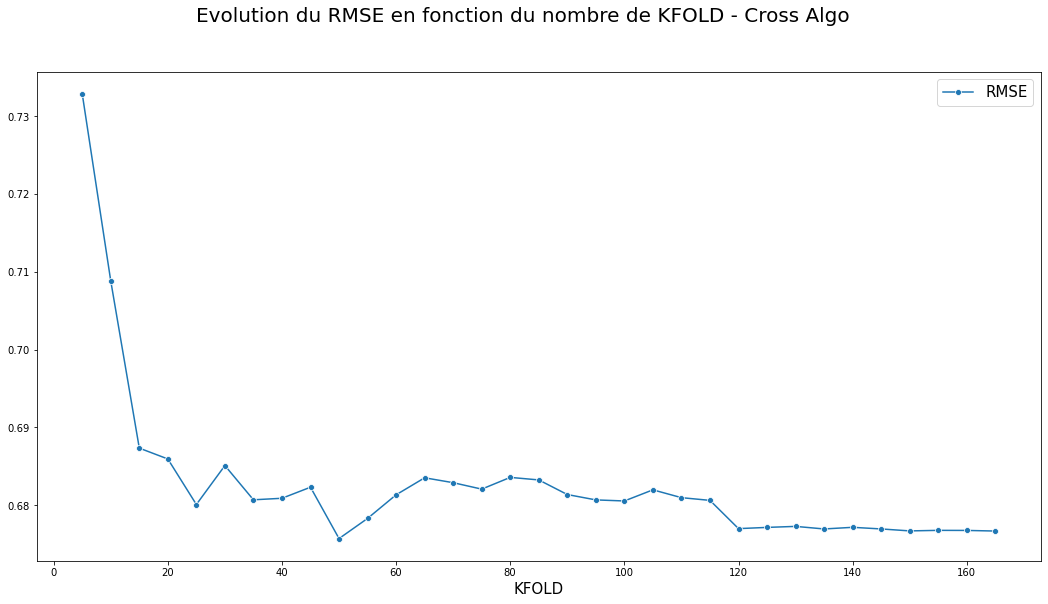

In [182]:
fig, ax = plt.subplots(figsize=(18,9))
fig.suptitle("Evolution du RMSE en fonction du nombre de KFOLD - Cross Algo", fontsize=20)

sns.lineplot(
    x = cv_list, 
    y=RMSE_list,
    label="RMSE",
    linestyle="-",
    marker = "o"
)

ax.set_xlabel("KFOLD", fontsize=15)
ax.set_ylabel("", fontsize=15)
ax.legend(fontsize=15)

#### Compare the cross-validation error and the test error (MSE). What do you find?

In [191]:
X_test.index

Int64Index([ 47, 153,  53, 110, 170,  21,  63,  81,  51, 131, 113,  49, 126,
             88,  65, 155, 134, 136, 119,  76, 105, 111, 122, 160,  77,  75,
            175,  24,  52, 149, 150,  96,  54, 120, 121,  18,  13, 159, 117,
             64,  14, 107, 114, 128,  73],
           dtype='int64')

In [189]:
len(y_pred_test)

45

<AxesSubplot:ylabel='Alcohol'>

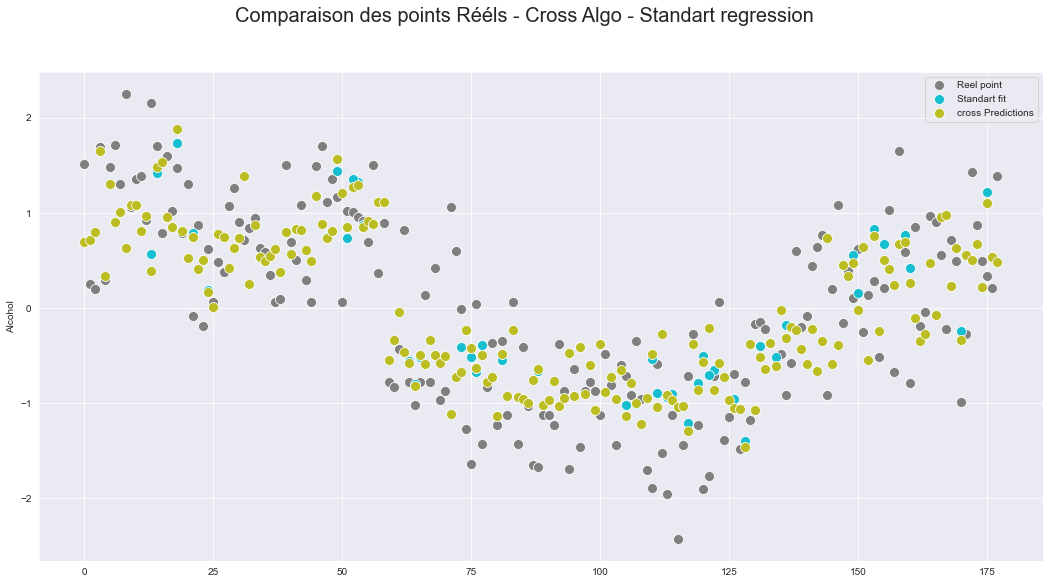

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(18,9))
fig.suptitle("Comparaison des points Rééls - Cross Algo - Standart regression", fontsize=20)

sns.scatterplot( 
    x=df_wine.index, 
    #x="MSE",
    y=alcohol, 
    s=100,
    label="Reel point",
    color=colors[4]
)

sns.scatterplot( 
    x=X_test.index, 
    #x="MSE",
    y=y_pred_test, 
    s=100,
    label="Standart fit",
    color=colors[0]
)

sns.scatterplot(
    x=df_wine.index, 
    #x="MSE",
    y=crossPrediction, 
    s=100,
    label="cross Predictions",
    color=colors[2]
)

In [194]:
df_wine.index

RangeIndex(start=0, stop=178, step=1)